In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("synthetic_mall_customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,38,66,36
1,2,Female,49,93,43
2,3,Male,40,44,44
3,4,Male,50,120,66
4,5,Male,20,65,38


In [2]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              500 non-null    int64 
 1   Gender                  500 non-null    object
 2   Age                     500 non-null    int64 
 3   Annual Income (k$)      500 non-null    int64 
 4   Spending Score (1-100)  500 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 19.7+ KB


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

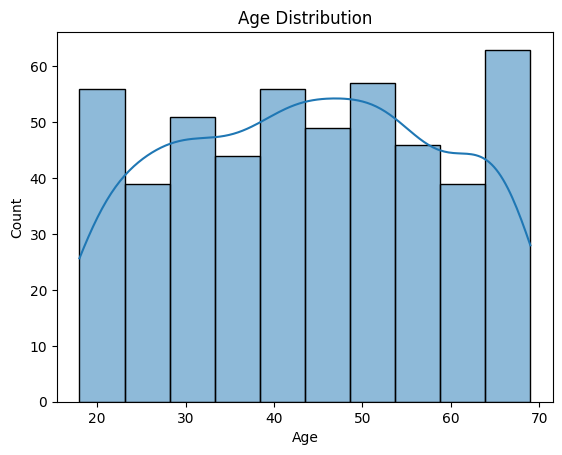

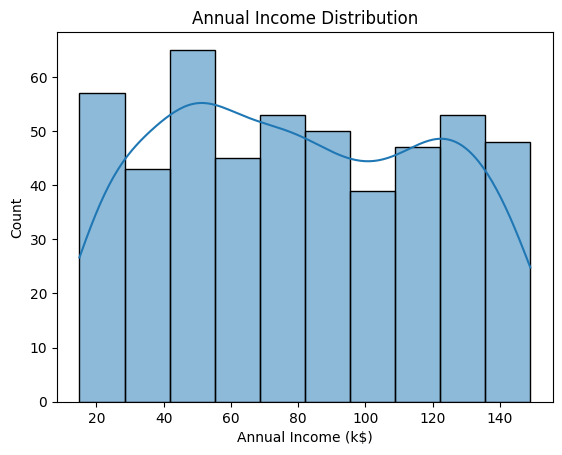

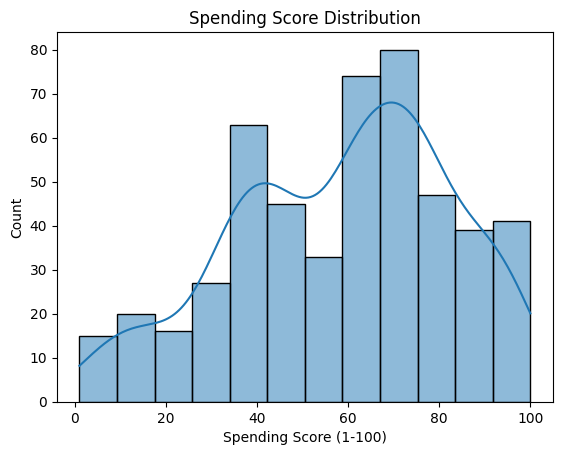

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age distribution
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

# Income distribution
sns.histplot(df['Annual Income (k$)'], kde=True)
plt.title("Annual Income Distribution")
plt.show()

# Spending Score distribution
sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title("Spending Score Distribution")
plt.show()


In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male = 1, Female = 0


In [5]:
from sklearn.preprocessing import StandardScaler

features = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


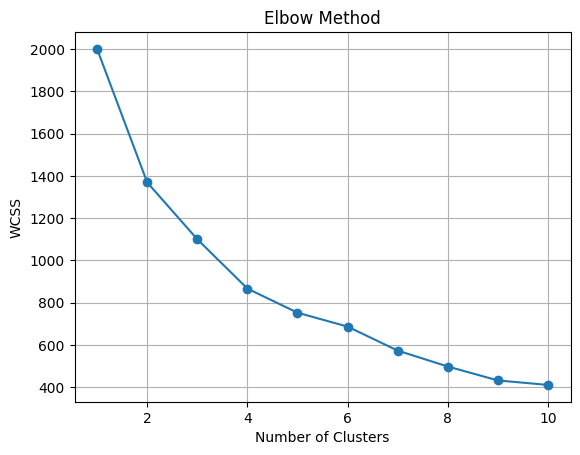

In [6]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()


In [7]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


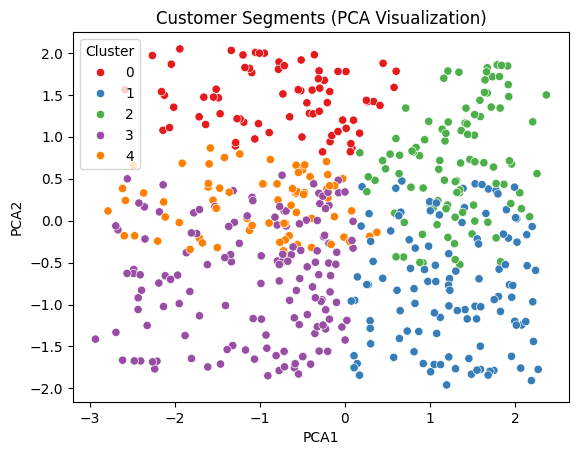

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set1')
plt.title("Customer Segments (PCA Visualization)")
plt.show()


In [9]:
df.groupby('Cluster')[features].mean()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,1.0,29.493151,54.739726,46.136986
1,0.0,44.278261,116.747826,79.078261
2,1.0,43.425743,118.613861,79.069307
3,0.0,44.680851,51.446809,41.028369
4,1.0,56.700000,50.942857,43.671429


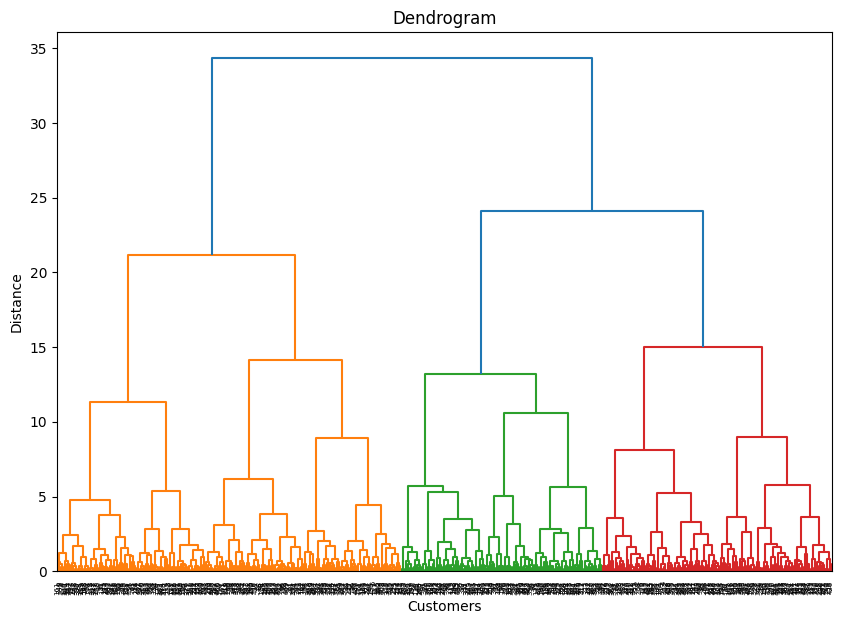

In [12]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

# Apply Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
df['Cluster_HC'] = hc.fit_predict(X_scaled)


In [11]:
df.to_csv("clustered_customers.csv", index=False)
